In [25]:
from data import Data
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [26]:
sin = torch.sin(torch.tensor(0.1))
cos = torch.cos(torch.tensor(0.1))

In [58]:
ih_param = torch.tensor([-0.5,+0.5])
hh_param1 = torch.tensor([cos, -sin])
hh_param2 = torch.tensor([sin, cos])
hh_param = torch.stack([hh_param1,hh_param2])
lin_param = torch.tensor([1,1])

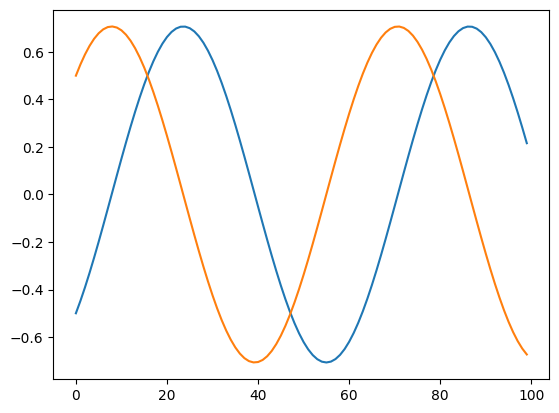

In [59]:
H = torch.zeros(100,2)
H[0] = 1*ih_param
for i in range(1,H.shape[0]):
    H[i] = torch.matmul(H[i-1], hh_param)
plt.plot(H)

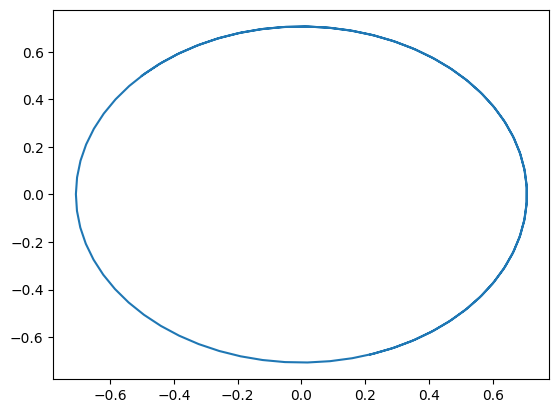

In [60]:
plt.plot(H[:,0]*lin_param[1],H[:,1]*lin_param[0])

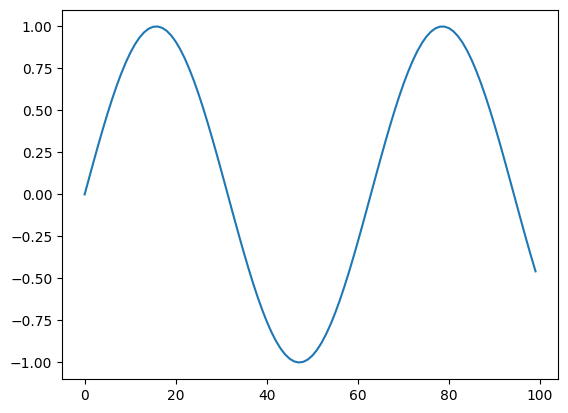

In [62]:
X_pred = H[:,0]*lin_param[0]+H[:,1]*lin_param[1]
plt.plot(X_pred)

We recovered sine wave using state spaces. What we have done is similar to what a simple RNN architecture does. Only difference is the application of activation function in each hidden state.

In [6]:
my_rnn = nn.RNN(1,2,bias=False)
my_lin = nn.Linear(2,1,bias=False)
print(my_rnn.weight_ih_l0.data.shape, my_rnn.weight_hh_l0.data.shape)
print(my_lin.weight.shape)

torch.Size([2, 1]) torch.Size([2, 2])
torch.Size([1, 2])


In [76]:
print(ih_param.shape, hh_param.shape, lin_param.shape)

torch.Size([2]) torch.Size([2, 2]) torch.Size([2])
